# How to easily use Batch Normalization
<hr/>


#### Preface
If you want to use Batch Normalization (BN) to Neural Network (NN)

The easiest way is to use   **" tf.contrib.layers.batch_norm "**

The key in Batch_Normalization is to approach and calculate the mini-batches rather than the average and standard deviation for the whole data, and to average and deviate only within the current mini-batch to normalize.

Let's figure out how to use it 


##### Good things to read
[https://arxiv.org/pdf/1502.03167v3.pdf](https://arxiv.org/pdf/1502.03167v3.pdf )

[Batch normalization in Neural Networks](https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c )

[Batch Normalization explain as Korean](https://shuuki4.wordpress.com/2016/01/13/batch-normalization-%EC%84%A4%EB%AA%85-%EB%B0%8F-%EA%B5%AC%ED%98%84/)

#### Import libraries

tensorflow provides a set of tutorial data. if you want to know more info [Visit Here](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist/ )

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random

#### Import Mnist datas

In [10]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Building functions for NN

The most important thing to remember, BN operates differently between training and test process.

That's why we have to input *" phase "* to let BN know that we going to do training or testing 

nb_classes means that we classify into ten numbers

In [11]:
def TO_FC_BN(X, size, phase, scope):
    with tf.variable_scope(scope):
        fc1 = tf.contrib.layers.fully_connected(X, size, activation_fn=None, scope='fully_connected', reuse=tf.AUTO_REUSE)
        fc2 = tf.contrib.layers.batch_norm(fc1, center = True, scale = True, is_training= phase, scope='bn', reuse=tf.AUTO_REUSE)
        return tf.nn.relu(fc2, name='relu')
    
def FC_2_NC(X, nb_classes, scope):
    return tf.contrib.layers.fully_connected(X, nb_classes, activation_fn=None, scope=scope, reuse=tf.AUTO_REUSE)    

### Make Model

ok. make really simple a NN

In [12]:
tf.reset_default_graph() 
nb_classes = 10

phase = tf.placeholder(dtype=tf.bool, name = 'phase')
X = tf.placeholder(shape=[None, 784], dtype=tf.float32, name='X')
Y = tf.placeholder(shape=[None, nb_classes], dtype=tf.float32, name='Y')

FC1 = TO_FC_BN(X, 128, phase=phase, scope='layer1')
FC2 = TO_FC_BN(FC1, 256, phase=phase, scope='layer2')
logits = FC_2_NC(FC2, nb_classes, scope='logits')


with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.name_scope('cost'):
     cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))

### Let's Training

** Important! **

When is_training is True the moving_mean and moving_variance need to be updated,

by default the update_ops are placed in *tf.Graphkeys.UPDATE_OPS*

so they need to be added as a dependency to the train_op

it's document of tf.contrib.layers.batch_norm, i know this is difficult to understand. But you do not have to be hard.

just use it like this,  that's all !

```python 

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    optimizer = tf.train.GradientDescentOptimizer(1e-2).minimize(cost)
        
```

In [13]:
def train(epochs = 20, batch_size = 200):
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        optimizer = tf.train.GradientDescentOptimizer(1e-2).minimize(cost)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict= {'X:0': batch_xs, 'Y:0': batch_ys, 'phase:0': True})
            avg_cost += c / total_batch

        print("Epoch:", '%04d,' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
        train_acc = sess.run(accuracy,feed_dict={'X:0': mnist.train.images, 'Y:0': mnist.train.labels, 'phase:0': True})
        test_acc = sess.run(accuracy,feed_dict={'X:0': mnist.test.images, 'Y:0': mnist.test.labels, 'phase:0': False})                    
        print('Train Accuracy: {:.2f}% '.format(train_acc * 100))
        print('Test Accuracy: {:.2f}% \n'.format(test_acc * 100))
        
        
    return sess

### Do Training and get accuracy every epoch 
Awesome!!! there are only two of fully connected layers, even i have not used dropout!

and also, i have used basic Gradient descent for training ! 

But I have to be surprised by the speed and accuracy, isn't it ? :)

In [14]:
sess = train()

Epoch: 0001, cost =  0.794697627
Train Accuracy: 88.81% 
Test Accuracy: 80.61% 

Epoch: 0002, cost =  0.369720259
Train Accuracy: 91.65% 
Test Accuracy: 89.67% 

Epoch: 0003, cost =  0.290335259
Train Accuracy: 92.97% 
Test Accuracy: 92.21% 

Epoch: 0004, cost =  0.247273118
Train Accuracy: 93.83% 
Test Accuracy: 93.19% 

Epoch: 0005, cost =  0.220348850
Train Accuracy: 94.43% 
Test Accuracy: 93.96% 

Epoch: 0006, cost =  0.199742093
Train Accuracy: 94.97% 
Test Accuracy: 94.38% 

Epoch: 0007, cost =  0.184440559
Train Accuracy: 95.38% 
Test Accuracy: 94.75% 

Epoch: 0008, cost =  0.171512970
Train Accuracy: 95.69% 
Test Accuracy: 95.06% 

Epoch: 0009, cost =  0.160213211
Train Accuracy: 95.97% 
Test Accuracy: 95.29% 

Epoch: 0010, cost =  0.150576325
Train Accuracy: 96.20% 
Test Accuracy: 95.44% 

Epoch: 0011, cost =  0.143458702
Train Accuracy: 96.41% 
Test Accuracy: 95.66% 

Epoch: 0012, cost =  0.136412503
Train Accuracy: 96.60% 
Test Accuracy: 95.93% 

Epoch: 0013, cost =  0.12888

### You may want to see a test result as image

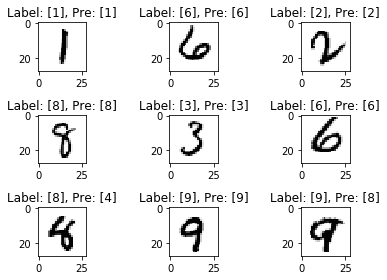

In [15]:
for i in range(9):

    r = random.randint(0, mnist.test.num_examples - 1)
    plt.subplot(3,3,i+1)

    plt.title('Label: {}, Pre: {}'.format(sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)),
                                                  sess.run(tf.argmax(logits, 1), 
                                                           feed_dict={'X:0': mnist.test.images[r:r+1],'phase:0': False})))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap = 'Greys')
    plt.tight_layout()

### OK, Let's see what our model did not expect as image

In [16]:
def show_incorrect():
    la = sess.run(tf.argmax(mnist.test.labels,1))
    pre = sess.run(tf.argmax(logits, 1),feed_dict={'X:0': mnist.test.images,'phase:0': False})
    

    incorrect = la == pre
    incorrect = np.array(np.where(incorrect == False)).reshape(-1)
    for i in range(9):
        r = np.random.choice(incorrect)
        plt.subplot(3,3,i+1)
        plt.title('Label: {}, Pre: {}'.format(la[r:r+1],pre[r:r+1]))
        plt.imshow(mnist.test.images[r].reshape(28, 28), cmap = 'Greys')
        plt.tight_layout()

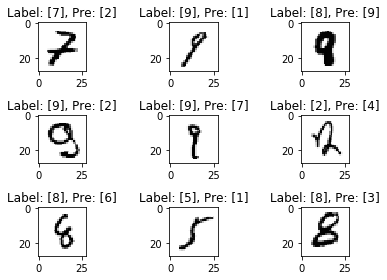

In [17]:
show_incorrect()